<a href="https://colab.research.google.com/github/bhuwich/Tensorflow/blob/main/CNNClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import cv2

In [ ]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(2,(3,3), strides=(1,1), padding='same', use_bias=False),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 2)         18        
                                                                 
 activation (Activation)     (None, 28, 28, 2)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 2)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 10)                3930      
                                                                 
Total params: 3,948
Trainable params: 3,948
Non-trainable params: 0
______________________________________________________

dense น้อยที่สุด และมีประสิทธิภาพสูงสุด

ถ้า ข้อมูลน้อย dense ต้องน้อย

ถ้า ข้อมูลเยอะ dense ต้องเยอะ

ถ้าข้อมูลน้อยต้องออกแบบ feature exaction ดีๆ

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)/255.0
x_test = np.expand_dims(x_test,axis=-1)/255.0

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
model.output_shape

(None, 10)

In [ ]:
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
es =  tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',patience=10, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor= 'val_loss', mode='min', save_best_only=True, verbose=1)

In [ ]:
model.fit(
    x_train, y_train,
    validation_split = 0.3, # -> มันไม่ได้ shuffle ให้เรา
    batch_size = 64,
    callbacks =[es,mc],
    epochs = 100000
)

Epoch 1/100000
656/657 [============================>.] - ETA: 0s - loss: 0.2543 - accuracy: 0.9259
Epoch 1: val_loss improved from 0.29377 to 0.22042, saving model to best_model.h5
657/657 [==============================] - 4s 6ms/step - loss: 0.2542 - accuracy: 0.9260 - val_loss: 0.2204 - val_accuracy: 0.9373
Epoch 2/100000
645/657 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9402
Epoch 2: val_loss improved from 0.22042 to 0.19243, saving model to best_model.h5
657/657 [==============================] - 3s 4ms/step - loss: 0.2051 - accuracy: 0.9403 - val_loss: 0.1924 - val_accuracy: 0.9436
Epoch 3/100000
647/657 [============================>.] - ETA: 0s - loss: 0.1807 - accuracy: 0.9468
Epoch 3: val_loss improved from 0.19243 to 0.17658, saving model to best_model.h5
657/657 [==============================] - 3s 4ms/step - loss: 0.1807 - accuracy: 0.9469 - val_loss: 0.1766 - val_accuracy: 0.9492
Epoch 4/100000
645/657 [============================>.] - ETA

In [ ]:
model = tf.keras.models.load_model("best_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 2)         18        
                                                                 
 activation (Activation)     (None, 28, 28, 2)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 2)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 10)                3930      
                                                                 
Total params: 3,948
Trainable params: 3,948
Non-trainable params: 0
______________________________________________________

In [ ]:
output_test = model.predict(x_test)
output_test.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [ ]:
(output_test[0,:])

array([1.45150281e-10, 6.79043207e-14, 1.17388215e-08, 1.47402416e-05,
       2.54425184e-14, 2.70601874e-10, 2.20704601e-22, 9.99982953e-01,
       1.13540978e-07, 2.15691193e-06], dtype=float32)

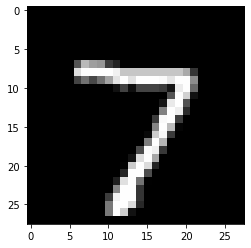

In [ ]:
plt.imshow(x_test[0,:,:,0], cmap='gray')

In [ ]:
detect = np.argmax(output_test, axis=1)
detect

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(skm.classification_report(y_test, detect))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.95      0.95      0.95      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
feature_extractor = tf.keras.Sequential(
    [tf.keras.Input(shape=(28,28,1))] + \
    model.layers[:3]
)
feature_extractor.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 2)         18        
                                                                 
 activation (Activation)     (None, 28, 28, 2)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 2)        0         
 )                                                               
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
feature = feature_extractor.predict(x_test[0:1,:,:,:])
feature.shape

1/1 [==============================] - 0s 30ms/step


(1, 14, 14, 2)

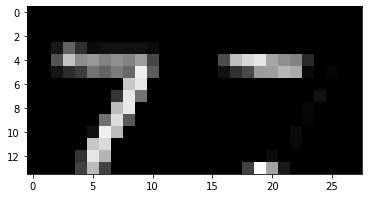

In [ ]:
plt.imshow(
    cv2.hconcat([
        feature[0,:,:,0],
        feature[0,:,:,1],
    ]), cmap='gray'
)